In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# **READING THE DATA**

In [2]:
df=pd.read_csv('/kaggle/input/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [3]:
#display the first five rows of the data
df.head().\
style.background_gradient(subset='Sales',cmap='Blues').\
background_gradient(subset='Profit',cmap='Blues').\
background_gradient(subset='Discount',cmap='Greens')

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.120000,401.280000,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.180000,149.800000,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.210000,165.200000,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.250000,89.600000,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.260000,918.450000,Tamil Nadu


In [8]:
#display the rows and columns
df.shape

(9994, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [8]:
# Dataframe has no NaN values. Lets look at its statistical view . using describe()
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [9]:
df.describe(include='object')

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,State
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,9994,50,7,23,24,1236,5,1
top,OD1,Amrish,Snacks,Health Drinks,Kanyakumari,09-05-2017,West,Tamil Nadu
freq,1,227,1514,719,459,38,3203,9994


In [10]:
#column names of table
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [11]:
# lets check data type of columns/attributes
df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

There are categorical and numerical data in this dataset. 

Now, we will take a look at the columns into two categories: Categorical and numerical data. For this section, we will have a general understanding of the most important columns. Next section we will explore correlation among columns.

Categorical columns:

Order ID          
Customer Name     
Category          
Sub Category      
City              
Order Date       
Region   
State

Numerical columns:

Sales
Profit
Discount

# **## Data Cleaning**

In [11]:
#Let's change the datatype of Order Date from object to date
df ['Order Date'] = pd.to_datetime (df ['Order Date'], errors='ignore')

In [12]:
#changed to date data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [13]:
#Extract month from the order date
#Extract month from the order date
df['month_no'] = df['Order Date'].dt.month
df['Month'] = pd.to_datetime(df['Order Date']).dt.strftime('%B')
df['year'] = df['Order Date'].dt.year


In [14]:
#check the data to view the added columns
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,November,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,November,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,June,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,October,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,October,2016


In [15]:
# Let"s count the number of missing (NaN) values in each column 
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

There is no missing values


In [16]:
#count the number of duplicate rows 
df.duplicated().sum()

0

# DATA ANALYSIS AND INSIGHT

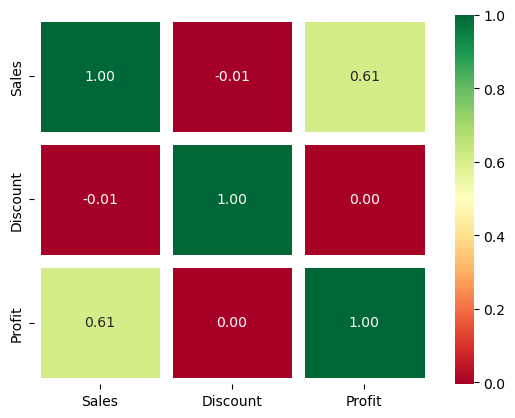

In [18]:
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn',fmt='.2f', lw = 8, linecolor = 'white');

Analysis:

1. **Sales and Profit Correlation (0.61)**:
   - A positive correlation of 0.61 between sales and profit suggests a moderately strong positive relationship between these two variables.
   - As sales increase, profit tends to increase as well, and as sales decrease, profit tends to decrease. The relationship is not perfect but is still considered positive.

2. **Discount and Profit Correlation (0.00)**:
   - There is no significant trend or pattern suggesting that changes in discount lead to predictable changes in profit. 
   - In practical terms, this correlation suggests that there is  no linear relationship between the amount of discount applied and the resulting profit. Changes in discount have minimal impact on profit.
   
 
3. **Discount and Sales Correlation (-0.01)**:
   - A very low negative correlation of -0.01 between discount and sales suggests a very weak negative relationship between these two variables.
   - In practical terms, this correlation indicates that there is almost no linear relationship between the amount of discount applied and the level of sales. Changing the discount has little impact on sales.

# **## Bivariate Analysis**

We will be comparing other features to profit, and sales to get a visual idea about what affects the profit and sales most.

# 1. Category

In [ ]:
region_df = pd.DataFrame(df.groupby(['Region'])[['Profit', 'Sales', 'Quantity']].sum())
region_df

In [15]:
#we want to find the total sales and profit by category
# firstly, we group by Category and get the total number of sales and profit for each category
category_df= pd.DataFrame(df.groupby(["Category"])[["Sales","Profit"]].sum())
category_df

,Sales,Profit
Category,,
Bakery,2112281,528521.06
Beverages,2085313,525605.76
"Eggs, Meat & Fish",2267401,567357.22
Food Grains,2115272,529162.64
Fruits & Veggies,2100727,530400.38
Oil & Masala,2038442,497895.29
Snacks,2237546,568178.85


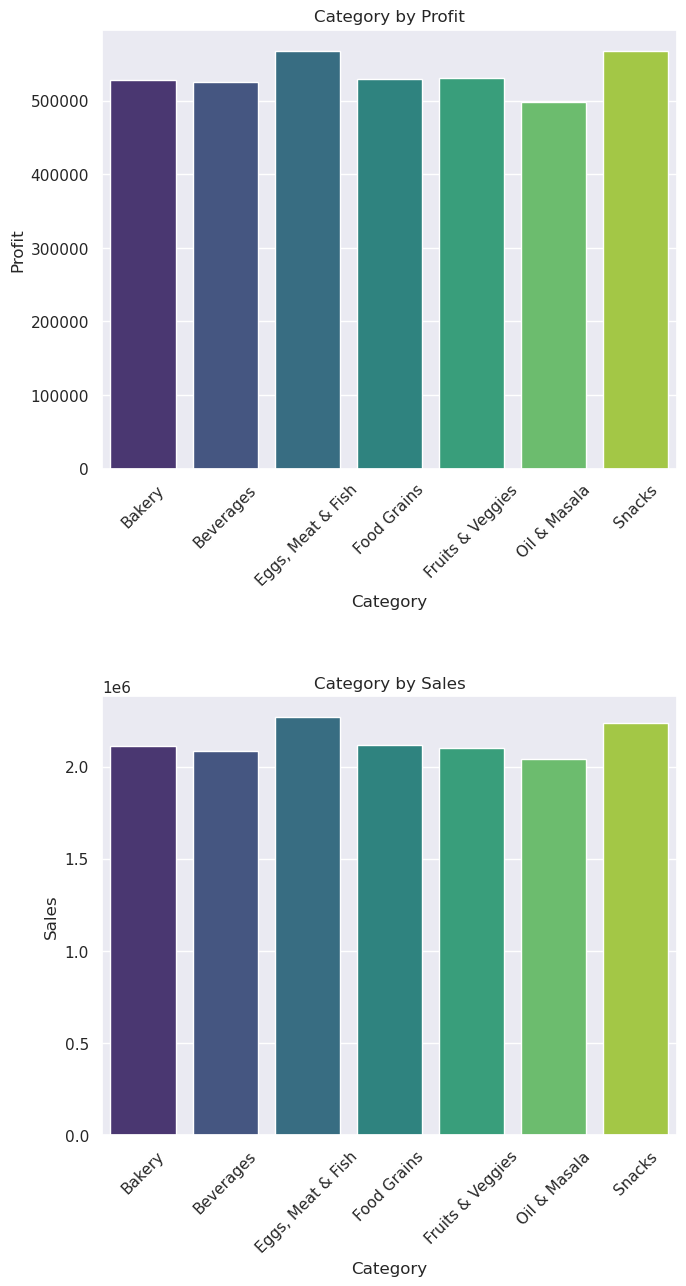

In [74]:
fig, axes = plt.subplots(2,1, figsize=(8,14))
sns.set_theme(style="darkgrid")
axes[0].set_title("Category by Profit")
axes[1].set_title("Category by Sales")

sns.barplot(x=category_df.index,
           y=category_df['Profit'],
           data= category_df,
             palette='viridis',
           ax = axes[0]);

sns.barplot(x=category_df.index,
           y=category_df['Sales'],
           data= category_df,
             palette='viridis',
           ax = axes[1]);

axes[0].set_xticklabels(category_df.index, rotation=45)
axes[1].set_xticklabels(category_df.index, rotation=45)

plt.tight_layout(pad=4)

The categories of Eggs, Meat & Fish, and Snacks make the most significant contributions to the sales, accounting for approximately 30% of the total sales. These categories demonstrate strong sales potential, suggesting that allocating additional resources and investments in them could yield promising returns for the company.

In [4]:
sub_category_df = pd.DataFrame(df.groupby(['Sub Category'])[['Profit', 'Sales']].sum())
sub_category_df

,Profit,Sales
Sub Category,,
Atta & Flour,127861.10,534649
Biscuits,169357.62,684083
Breads & Buns,190764.98,742586
Cakes,168398.46,685612
Chicken,124049.89,520497
Chocolates,183849.34,733898
Cookies,190643.70,768213
Dals & Pulses,130232.29,523371
Edible Oil & Ghee,168593.58,668086


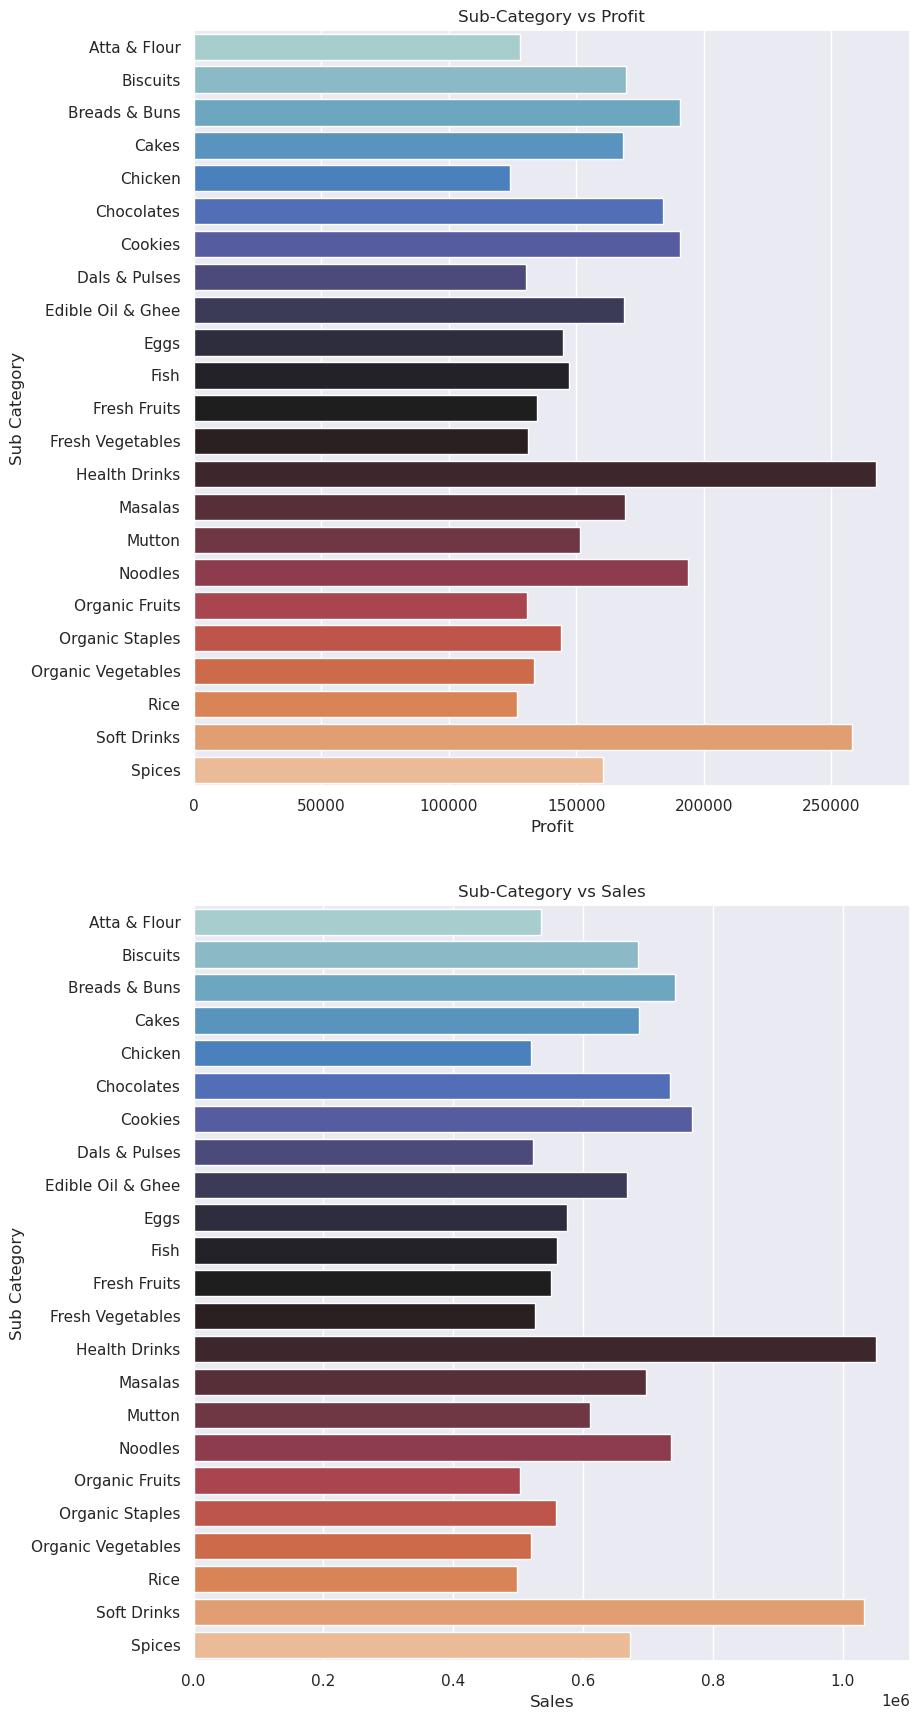

In [50]:
fig, axes = plt.subplots(2,1, figsize=(10,18))

sns.set_theme(style="darkgrid")
axes[0].set_title("Sub-Category vs Profit")
axes[1].set_title("Sub-Category vs Sales")

sns.barplot(y=sub_category_df.index,
           x='Profit',
           data=sub_category_df,
           palette='icefire',
           ax=axes[0])

sns.barplot(y=sub_category_df.index,
           x='Sales',
           data=sub_category_df,
           palette='icefire',
           ax=axes[1])

plt.tight_layout(pad=3);

The bar chart findings indicate that Health Drinks and Soft Drinks are the most frequently purchased products. Customers show a clear preference for these items. The company should Ensure that Health Drinks and Soft Drinks are prominently displayed and easily accessible in stores or on the company's website. 

## 2. Region

In [42]:
region_df = pd.DataFrame(df.groupby(['Region'])[['Profit', 'Sales']].sum())
region_df

,Profit,Sales
Region,,
Central,856806.84,3468156
East,1074345.58,4248368
North,401.28,1254
South,623562.89,2440461
West,1192004.61,4798743


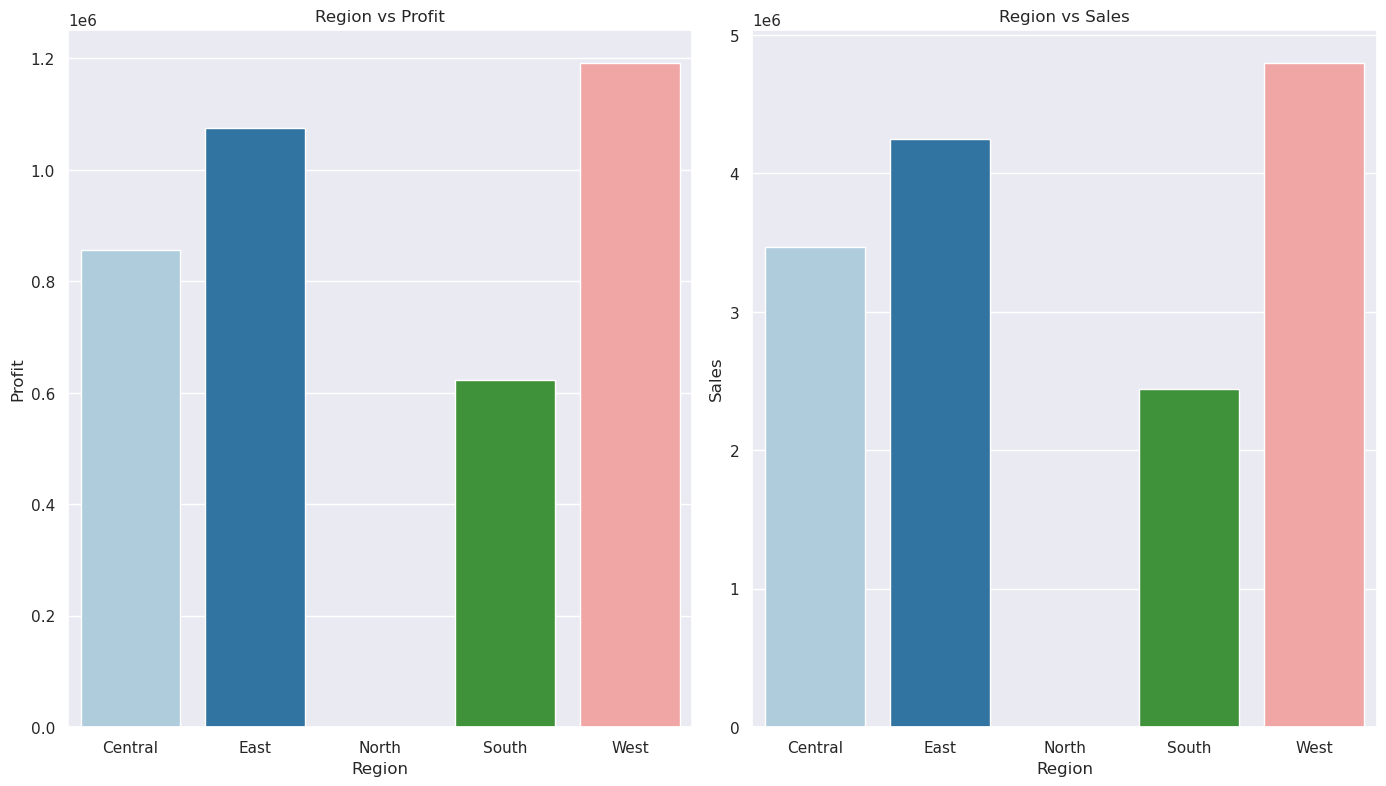

In [45]:
fig, axes = plt.subplots(1,2, figsize=(14,8))

sns.set_theme(style="darkgrid")
axes[0].set_title("Region vs Profit")
axes[1].set_title("Region vs Sales")

sns.barplot(x=region_df.index,
           y='Profit',
           data=region_df,
           palette='Paired',
           ax=axes[0])

sns.barplot(x=region_df.index,
           y='Sales',
           data=region_df,
           palette='Paired',
           ax=axes[1])

plt.tight_layout(pad=1);

Based on the findings from the bar chart analysis, it is evident that both the East and West regions make the most substantial contributions to the company's financial performance. These regions stand out as key drivers of the company's success, highlighting their pivotal roles in generating revenue and profitability."

## 3. Cities

In [15]:
#Step 1: Extract relevant columns
city_sales = df[['City', 'Sales']]
cities_df = city_sales.groupby('City').sum().sort_values('Sales', ascending=False)
top5_sales = cities_df.head()

city_sales = df[['City', 'Profit']]
cities1_df = city_sales.groupby('City').sum().sort_values('Profit',ascending = False)
top5_profit = cities1_df.head()

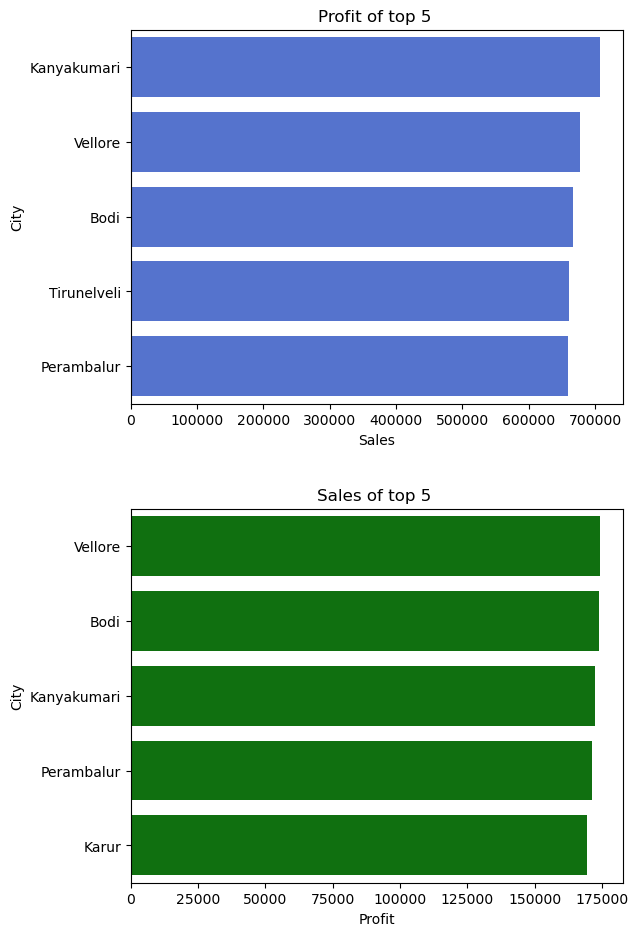

In [16]:
fig, axes = plt.subplots(2,1, figsize=(7, 10))

axes[0].set_title("Profit of top 5 ")
axes[1].set_title("Sales of top 5 ")

sns.barplot(y=top5_sales.index,
           x=top5_sales['Sales'],
           data=top5_sales,
            color='#4169E1',
           ax=axes[0])

sns.barplot(y=top5_profit.index,
           x=top5_profit['Profit'],
           data=top5_profit,
           color='green',
           ax=axes[1])

plt.tight_layout(pad=3);

The top 5 City with the highest profit between 2015 to 2018 were Kanyakumari,Vellore, Bodi, Tirunelveli and Perambalur. Kanyakumari had  0.71 Sales,Velllore had 0.68 Sales and Bodi had  0.67 Sales or about 4.5% sales respectively.

## 4. Month

In [75]:
# Sum up sales by month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_profit= df.groupby('Month')['Profit'].sum().reset_index()

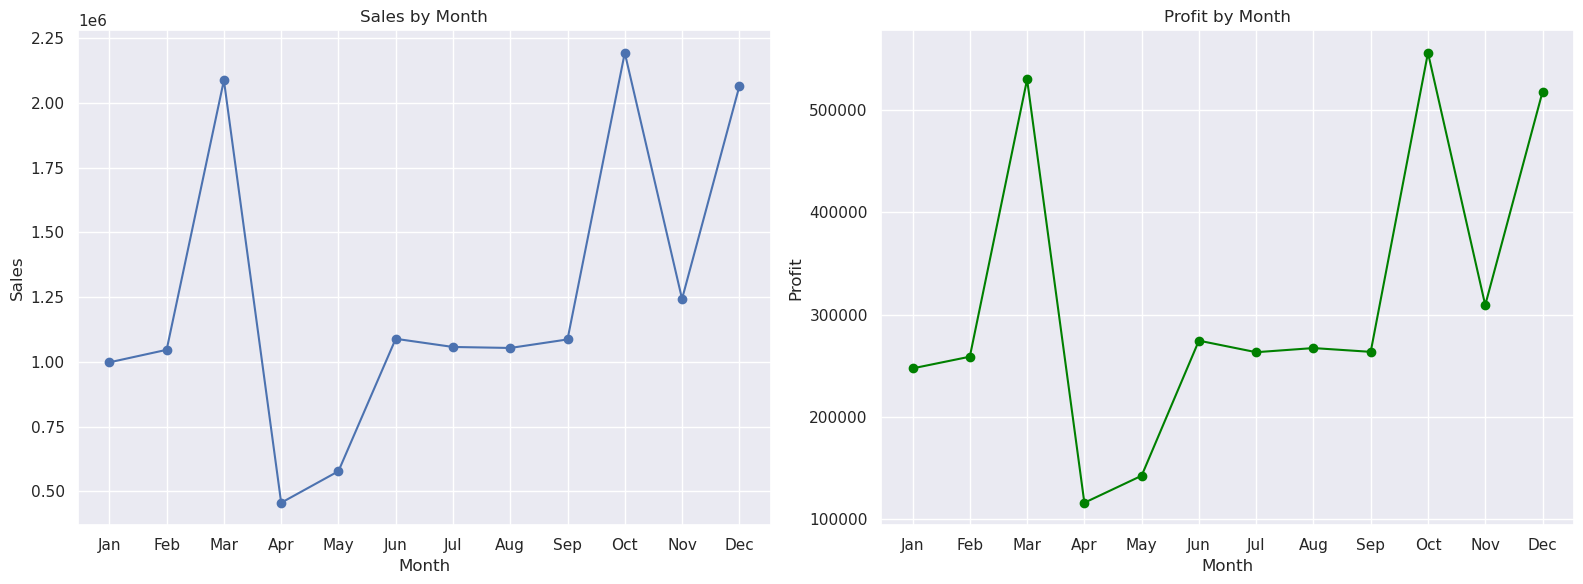

In [21]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust the figsize as needed

# First subplot: Sales by Month
axes[0].plot(monthly_sales_sorted['Month'], monthly_sales_sorted['Sales'], marker='o')
axes[0].set_title('Sales by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')
axes[0].set_xticks(monthly_sales_sorted['Month'])
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].grid(True)

# Second subplot: Profit by Month
axes[1].plot(monthly_profit_sorted['Month'], monthly_profit_sorted['Profit'], marker='o', color='green')
axes[1].set_title('Profit by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Profit')
axes[1].set_xticks(monthly_profit_sorted['Month'])
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

March,October and December are the highest profitability month

## 5. Year

In [76]:
#we want to find the Yearly Sales and profit
# we group by Year and get the total number of sales for each year
Yearly_Sales=df.groupby("year")["Sales"].sum()

# we group by Year and get the total number of sales for each year
Yearly_Profit=df.groupby("year")["Profit"].sum()


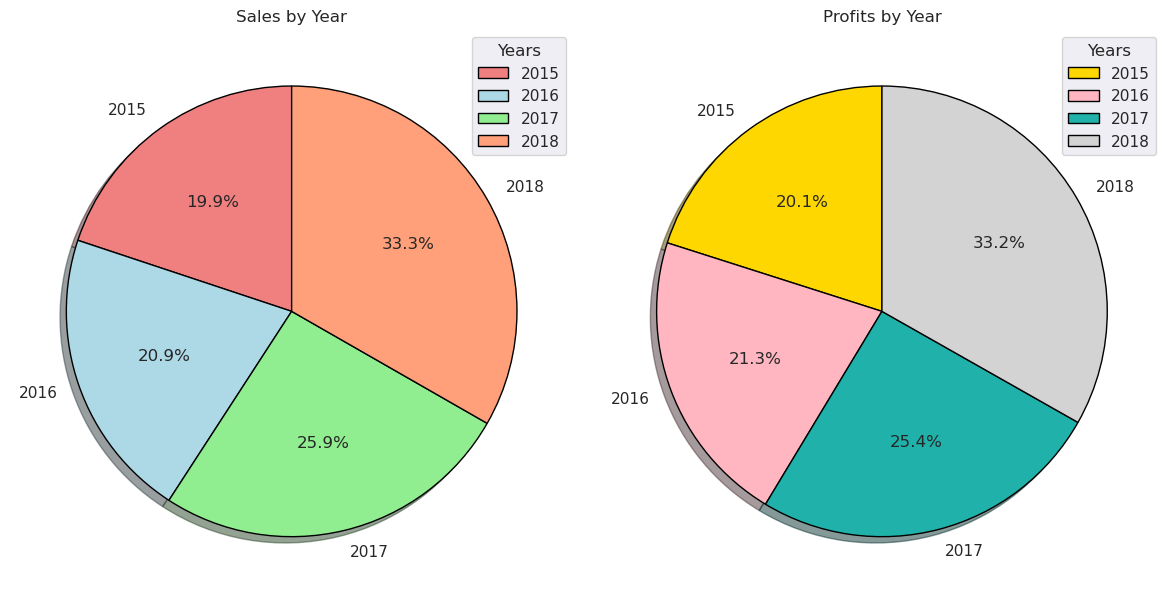

In [27]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figsize as needed

# Define custom colors for the pie slices
colors_sales = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon']
colors_profit = ['gold', 'lightpink', 'lightseagreen', 'lightgray']

# First subplot: Sales by Year
sales_pie, sales_text, sales_autotext = axes[0].pie(
    Yearly_Sales, labels=Yearly_Sales.index, autopct='%1.1f%%',
    colors=colors_sales, startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Sales by Year')

# Second subplot: Profits by Year
profit_pie, profit_text, profit_autotext = axes[1].pie(
    Yearly_Profit, labels=Yearly_Profit.index, autopct='%1.1f%%',
    colors=colors_profit, startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title('Profits by Year')

# Add legends
axes[0].legend(sales_pie, Yearly_Sales.index, title='Years', loc='upper right')
axes[1].legend(profit_pie, Yearly_Profit.index, title='Years', loc='upper right')

# Customize legend labels and position
axes[0].legend(sales_pie, Yearly_Sales.index, title='Years', loc='upper right')
axes[1].legend(profit_pie, Yearly_Profit.index, title='Years', loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


The year 2017 and 2018 had more than 50 percent of the total sales which implies the sales increase as the year increases which shows the company devised better and suitable plan to increase sales at each point in time.